# Line chart

In [1]:
import pandas as pd
import sqlite3

## make a connection to the database (it is the same as the previous day)

In [2]:
conn = sqlite3.connect("../../data/checking-logs.sqlite")

## run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [27]:
query = '''
    SELECT datetime 
    FROM pageviews
    WHERE uid LIKE "user_%"
'''
views = pd.io.sql.read_sql(query, conn, parse_dates=["datetime"], index_col="datetime")

## using Pandas, create a new dataframe where the visits are counted and grouped by date

In [46]:
views_count = views.groupby(by = lambda x: x.date()).size()
views_count.name = "views"


## using Pandas, create a new dataframe where the visits are counted and grouped by date

<Axes: title={'center': 'Views per day'}, xlabel='Date'>

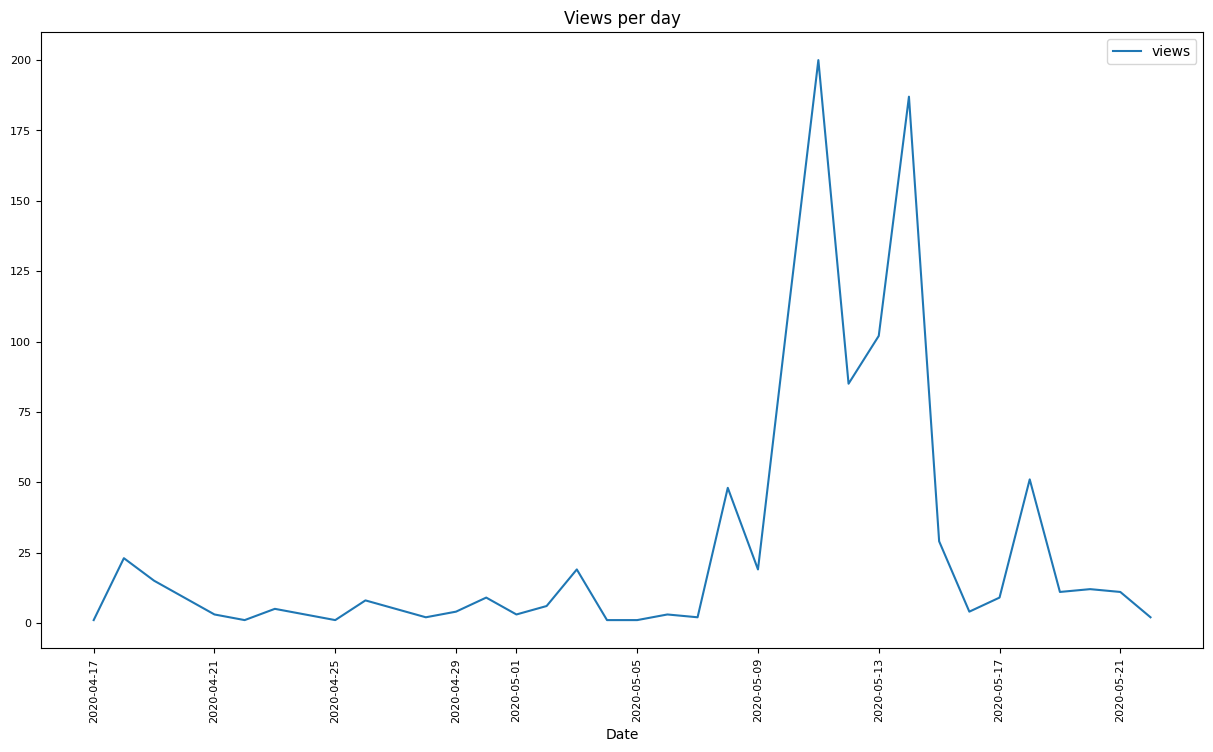

In [51]:
views_count.plot(
                fontsize = 8,
                figsize = (15, 8),
                title = "Views per day",
                xlabel = "Date",
                rot = 90,
                legend = True
                )

## close the connection to the database

In [52]:
conn.close()